In [ ]:
!gdown -q 1hsyA7pTTNGtVrUMxZ_Y74-slLj0hF0UX

In [ ]:
! gdown --no-check-certificate --folder 'https://drive.google.com/drive/folders/1Is2naAh8Gqes-RtW-ms-pQmG1LN_8zhX?usp=drive_link'

Retrieving folder list
/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'drive.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
Processing file 1gzouFQEaJAuAGOFSl_0JsWgaDmDy1Ll4 Country-data.csv
Retrieving folder list completed
Building directory structure
Building directory structure completed
/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'drive.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'doc-08-bc-docs.googleusercontent.com'. Ad

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

# Preprocessing

In [ ]:
df = pd.read_csv('/content/data/Country-data.csv')

In [ ]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
correlation_matrix = df.corr()

<ipython-input-10-68bbfff3c4eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


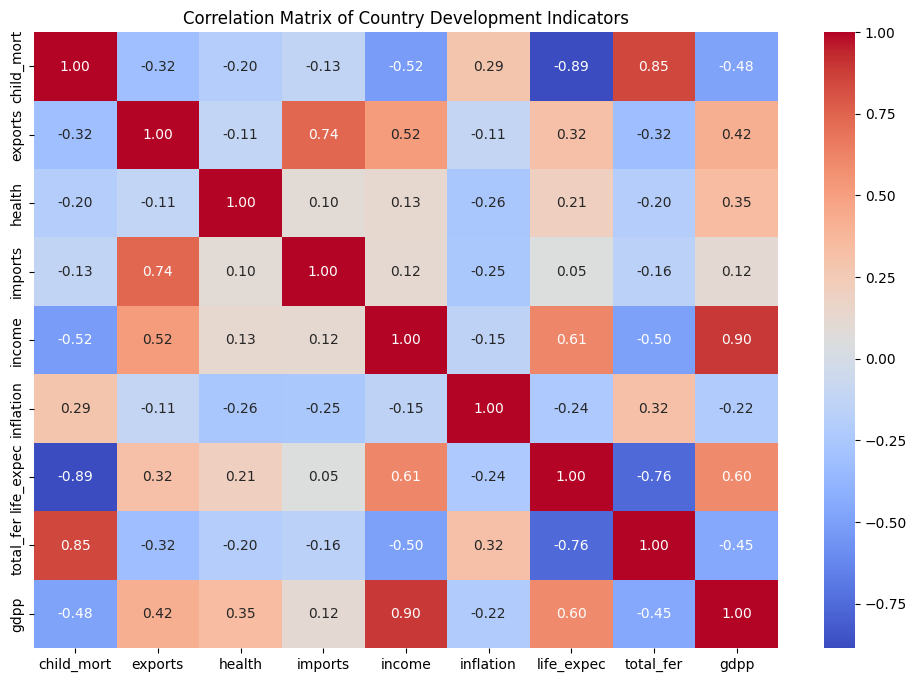

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Country Development Indicators")
plt.show()

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, 1:])

In [ ]:
scaled_data_df = pd.DataFrame(scaled_data, columns=df.columns[1:])

In [ ]:
std_data = pd.concat([df['country'], scaled_data_df], axis=1)

In [ ]:
std_data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,Venezuela,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,Vietnam,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,Yemen,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


#Kmeans

In [ ]:
inertia = []
silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    cluster_labels = kmeans.fit_predict(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, cluster_labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

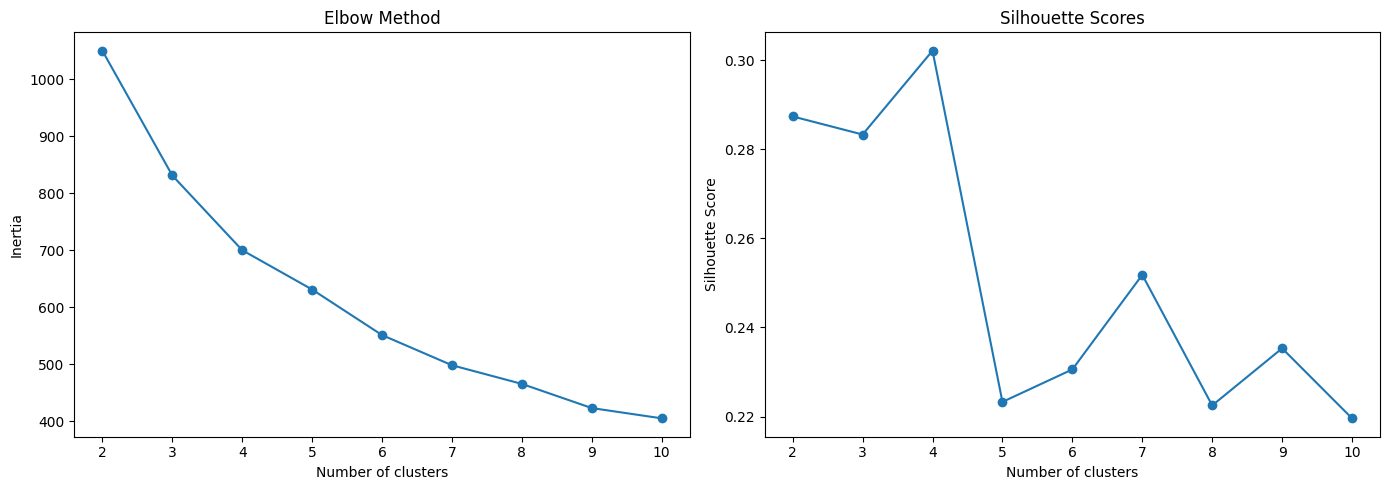

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Plotting the Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [ ]:
kmeans_optimal = KMeans(n_clusters=4, random_state=0)
clusters = kmeans_optimal.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
data_with_clusters = std_data.copy()
data_with_clusters['Cluster'] = clusters

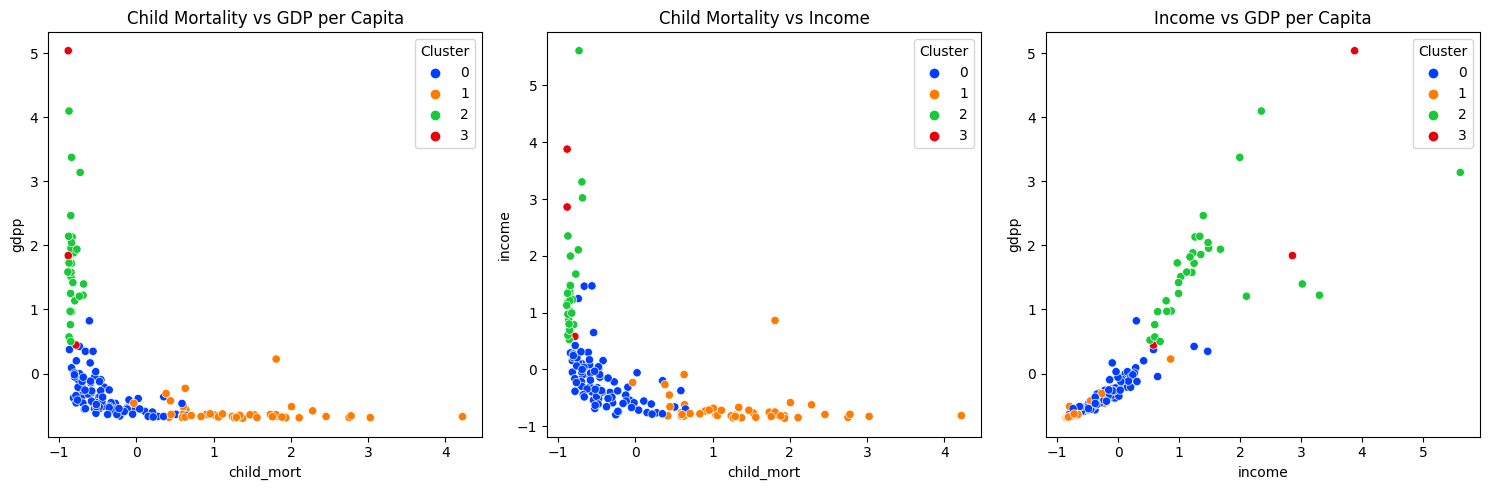

In [ ]:
# 'child_mort', 'gdpp', and 'income'

plt.figure(figsize=(15, 5))

# Plotting 'child_mort' vs 'gdpp'
plt.subplot(1, 3, 1)
sns.scatterplot(x='child_mort', y='gdpp', hue='Cluster', data=data_with_clusters, palette='bright')
plt.title('Child Mortality vs GDP per Capita')

# Plotting 'child_mort' vs 'income'
plt.subplot(1, 3, 2)
sns.scatterplot(x='child_mort', y='income', hue='Cluster', data=data_with_clusters, palette='bright')
plt.title('Child Mortality vs Income')

# Plotting 'income' vs 'gdpp'
plt.subplot(1, 3, 3)
sns.scatterplot(x='income', y='gdpp', hue='Cluster', data=data_with_clusters, palette='bright')
plt.title('Income vs GDP per Capita')

plt.tight_layout()
plt.show()

# GMM

In [ ]:
gmm_silhouette_scores = []

for i in range(2, 11):
    gmm = GaussianMixture(n_components=i, random_state=0)
    gmm_labels = gmm.fit_predict(scaled_data)
    gmm_silhouette_scores.append(silhouette_score(scaled_data, gmm_labels))

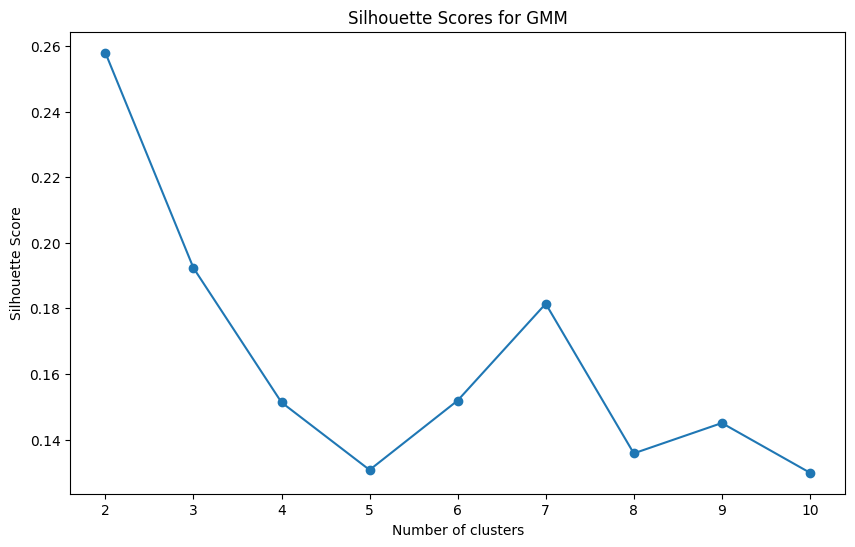

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), gmm_silhouette_scores, marker='o')
plt.title('Silhouette Scores for GMM')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
gmm_optimal = GaussianMixture(n_components=2, random_state=0)
gmm_clusters = gmm_optimal.fit_predict(scaled_data)

In [ ]:
data_with_gmm_clusters = std_data.copy()
data_with_gmm_clusters['Cluster'] = gmm_clusters

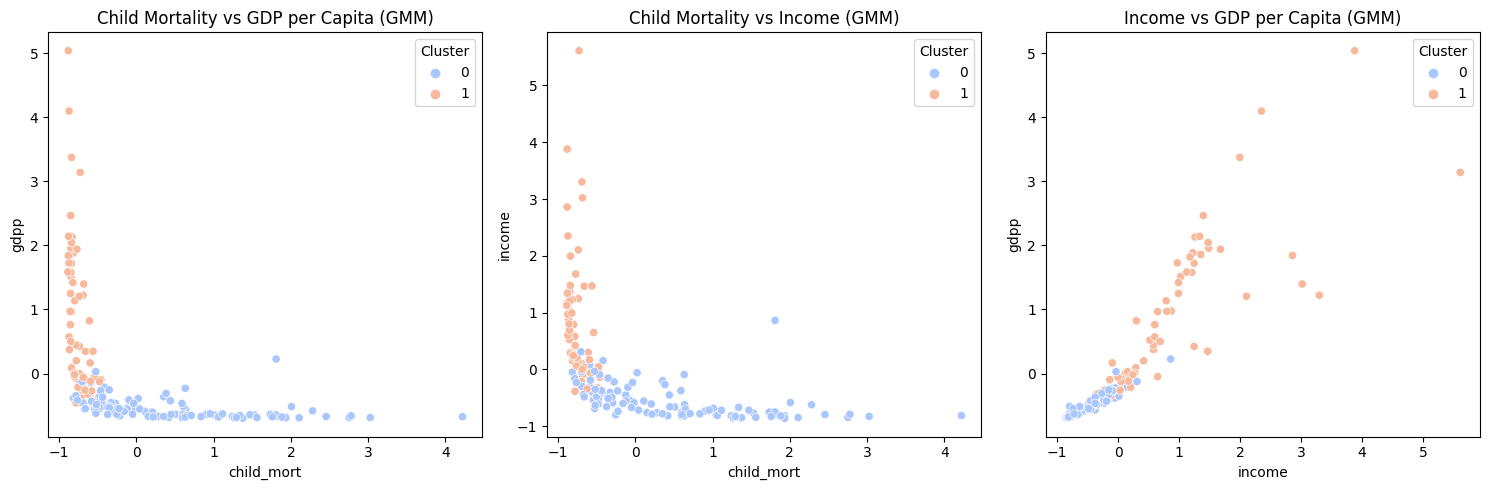

In [ ]:
plt.figure(figsize=(15, 5))

# Plotting 'child_mort' vs 'gdpp'
plt.subplot(1, 3, 1)
sns.scatterplot(x='child_mort', y='gdpp', hue='Cluster', data=data_with_gmm_clusters, palette='coolwarm')
plt.title('Child Mortality vs GDP per Capita (GMM)')

# Plotting 'child_mort' vs 'income'
plt.subplot(1, 3, 2)
sns.scatterplot(x='child_mort', y='income', hue='Cluster', data=data_with_gmm_clusters, palette='coolwarm')
plt.title('Child Mortality vs Income (GMM)')

# Plotting 'income' vs 'gdpp'
plt.subplot(1, 3, 3)
sns.scatterplot(x='income', y='gdpp', hue='Cluster', data=data_with_gmm_clusters, palette='coolwarm')
plt.title('Income vs GDP per Capita (GMM)')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.neighbors import kneighbors_graph
from scipy.sparse.csgraph import laplacian

In [ ]:
def custom_spectral_clustering(data, n_neighbors, n_clusters):

    connectivity_graph = kneighbors_graph(data, n_neighbors=n_neighbors, include_self=True)
    laplacian_matrix = laplacian(connectivity_graph, normed=True)
    eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix.toarray())
    vectors = eigenvectors[:, 1:n_clusters+1]
    spclusters = KMeans(n_clusters=n_clusters, random_state=0).fit_predict(vectors)

    return spclusters


In [ ]:
optimal_silhouette_scores_custom = []

for k in range(2, 11):
    spclusters_function = custom_spectral_clustering(scaled_data, n_neighbors=10, n_clusters=k)
    score = silhouette_score(scaled_data, spclusters_function)
    optimal_silhouette_scores_custom.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

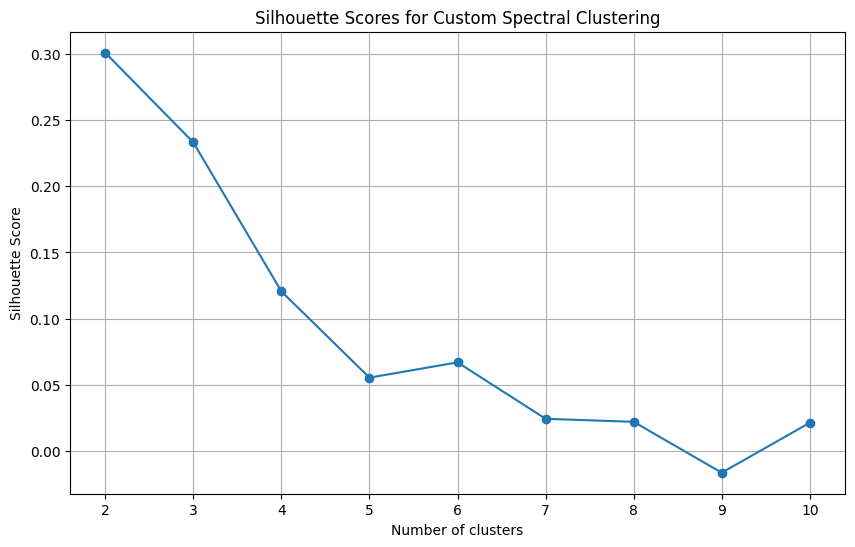

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), optimal_silhouette_scores_custom, marker='o')
plt.title('Silhouette Scores for Custom Spectral Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [ ]:
optimal_clusters_custom_spectral = custom_spectral_clustering(scaled_data, n_neighbors=5, n_clusters=2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
data_with_optimal_spectral_clusters = std_data.copy()
data_with_optimal_spectral_clusters['Cluster'] = optimal_clusters_custom_spectral

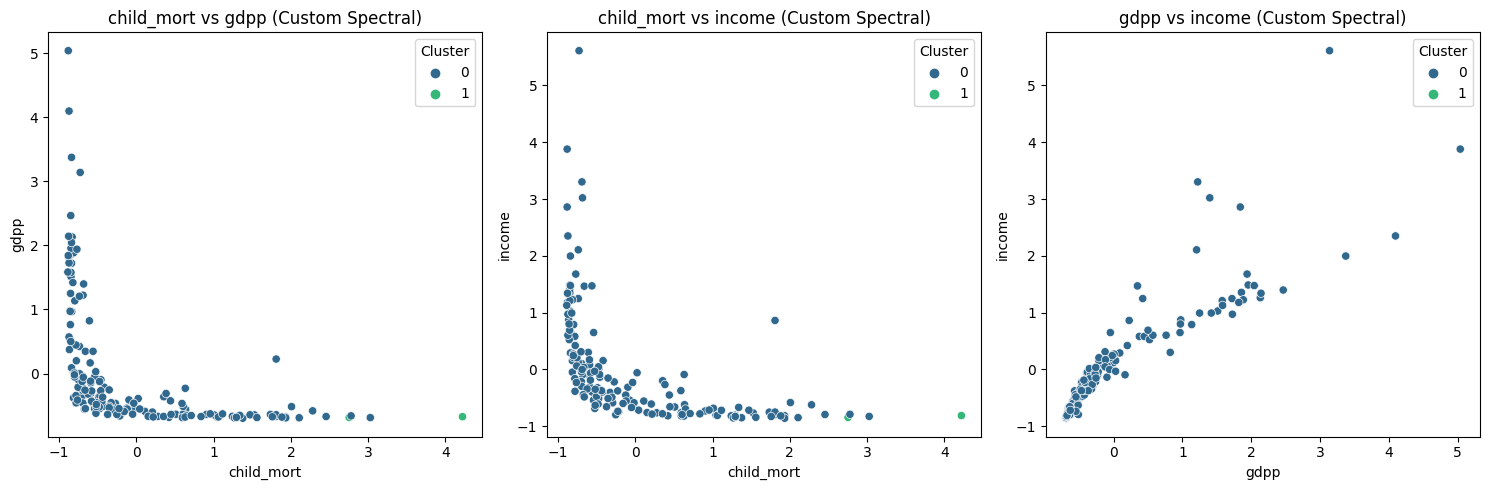

In [ ]:
features_to_plot = ['child_mort', 'gdpp', 'income']
pairwise_combinations = [(features_to_plot[i], features_to_plot[j]) for i in range(len(features_to_plot)) for j in range(i+1, len(features_to_plot))]

plt.figure(figsize=(15, 5))
for i, (x_feature, y_feature) in enumerate(pairwise_combinations, 1):
    plt.subplot(1, len(pairwise_combinations), i)
    sns.scatterplot(x=x_feature, y=y_feature, hue='Cluster', data=data_with_optimal_spectral_clusters, palette='viridis')
    plt.title(f'{x_feature} vs {y_feature} (Custom Spectral)')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import SpectralClustering

optimal_silhouette_scores_sklearn = []

for k in range(2, 11):
    spectral_clustering_sklearn = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', random_state=0)
    sklearn_clusters = spectral_clustering_sklearn.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, sklearn_clusters)
    optimal_silhouette_scores_sklearn.append(score)

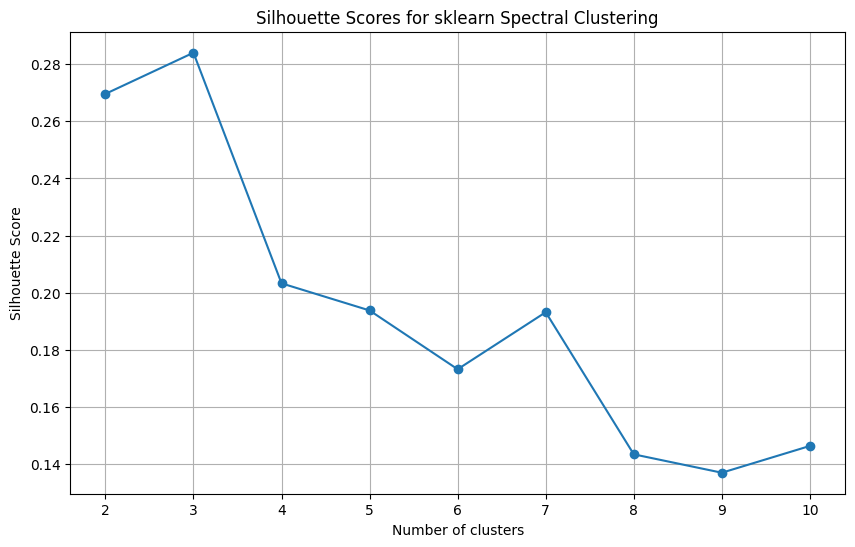

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), optimal_silhouette_scores_sklearn, marker='o')
plt.title('Silhouette Scores for sklearn Spectral Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [ ]:
spectral_clustering_sklearn_optimal = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=0)
sklearn_clusters_optimal = spectral_clustering_sklearn_optimal.fit_predict(scaled_data)

In [ ]:
data_with_sklearn_spectral_clusters = std_data.copy()
data_with_sklearn_spectral_clusters['Cluster'] = sklearn_clusters_optimal

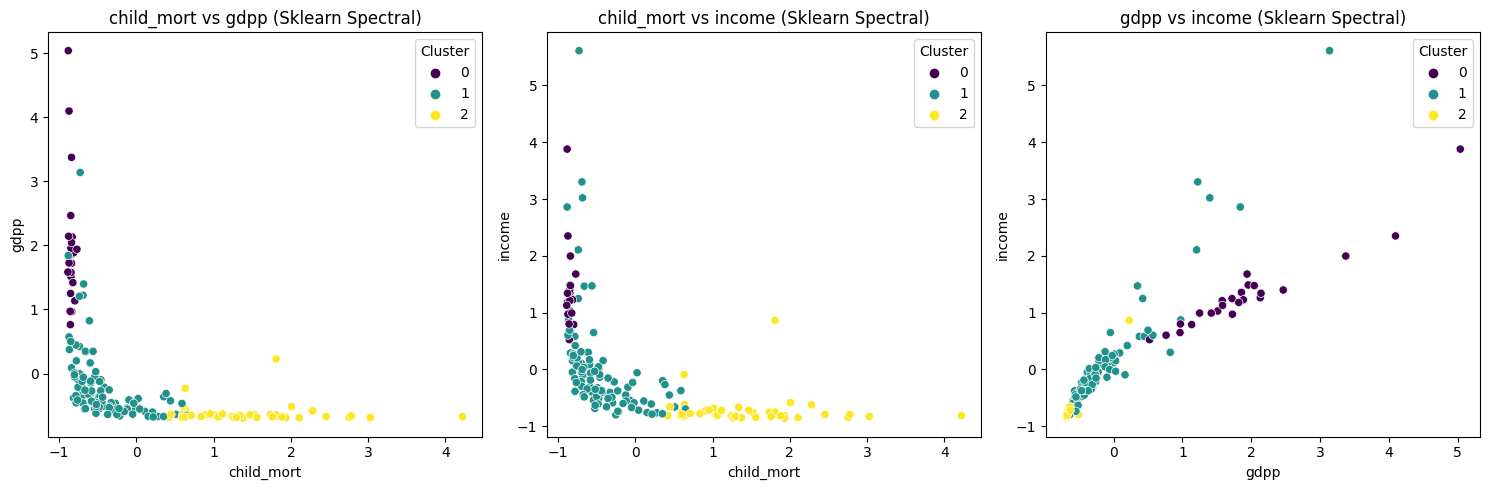

In [ ]:
plt.figure(figsize=(15, 5))
for i, (x_feature, y_feature) in enumerate(pairwise_combinations, 1):
    plt.subplot(1, len(pairwise_combinations), i)
    sns.scatterplot(x=x_feature, y=y_feature, hue='Cluster', data=data_with_sklearn_spectral_clusters, palette='viridis')
    plt.title(f'{x_feature} vs {y_feature} (Sklearn Spectral)')

plt.tight_layout()
plt.show()

# Part 2

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


In [ ]:
(x_train, y_train), (x_val, y_val) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
x_train = preprocess_input(x_train)
x_val = preprocess_input(x_val)
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)


#DenseNet

In [ ]:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False

29084464/29084464 [==============================] - 2s 0us/step


In [ ]:
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
batch_size = 64
epochs = 10

In [ ]:
train_datagen = ImageDataGenerator(horizontal_flip=True, zoom_range=0.2, width_shift_range=0.1, height_shift_range=0.1)
val_datagen = ImageDataGenerator()

In [ ]:
train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(x_val, y_val, batch_size=batch_size)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(x_train) // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=len(x_val) // batch_size
)

Epoch 1/10
781/781 [==============================] - 55s 57ms/step - loss: 1.2175 - accuracy: 0.5751 - val_loss: 1.0127 - val_accuracy: 0.6437
Epoch 2/10
781/781 [==============================] - 41s 52ms/step - loss: 1.0198 - accuracy: 0.6430 - val_loss: 0.9595 - val_accuracy: 0.6628
Epoch 3/10
781/781 [==============================] - 41s 52ms/step - loss: 0.9655 - accuracy: 0.6609 - val_loss: 0.9415 - val_accuracy: 0.6677
Epoch 4/10
781/781 [==============================] - 41s 52ms/step - loss: 0.9396 - accuracy: 0.6685 - val_loss: 0.9331 - val_accuracy: 0.6712
Epoch 5/10
781/781 [==============================] - 41s 52ms/step - loss: 0.9037 - accuracy: 0.6807 - val_loss: 0.9128 - val_accuracy: 0.6754
Epoch 6/10
781/781 [==============================] - 41s 52ms/step - loss: 0.8819 - accuracy: 0.6895 - val_loss: 0.8886 - val_accuracy: 0.6828
Epoch 7/10
781/781 [==============================] - 41s 52ms/step - loss: 0.8573 - accuracy: 0.6974 - val_loss: 0.8686 - val_accuracy:

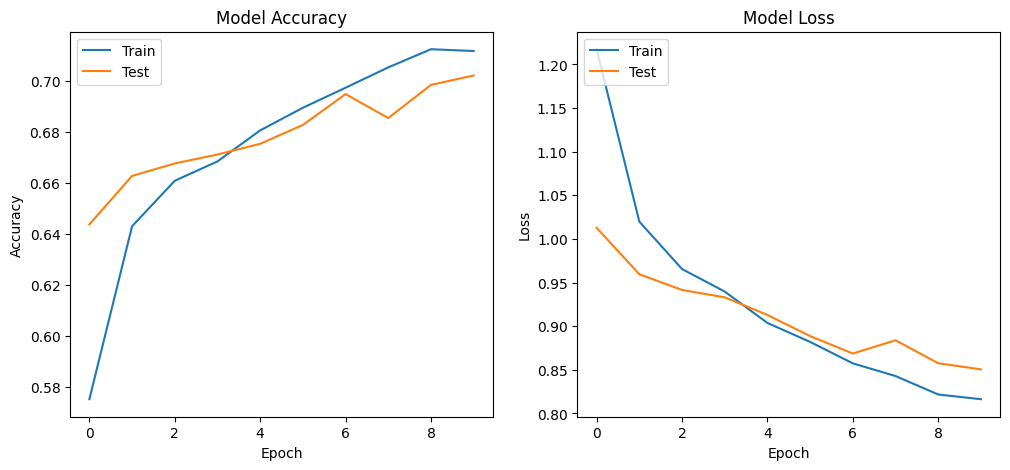

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

#VGG

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
batch_size = 64
epochs = 10

In [ ]:
train_datagen = ImageDataGenerator(horizontal_flip=True, zoom_range=0.2, width_shift_range=0.1, height_shift_range=0.1)
val_datagen = ImageDataGenerator()

In [ ]:
train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(x_val, y_val, batch_size=batch_size)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(x_train) // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=len(x_val) // batch_size
)

Epoch 1/10
781/781 [==============================] - 51s 56ms/step - loss: 0.7980 - accuracy: 0.7192 - val_loss: 0.8752 - val_accuracy: 0.6939
Epoch 2/10
781/781 [==============================] - 41s 52ms/step - loss: 0.7851 - accuracy: 0.7234 - val_loss: 0.8373 - val_accuracy: 0.7055
Epoch 3/10
781/781 [==============================] - 40s 52ms/step - loss: 0.7746 - accuracy: 0.7279 - val_loss: 0.8540 - val_accuracy: 0.7015
Epoch 4/10
781/781 [==============================] - 40s 51ms/step - loss: 0.7591 - accuracy: 0.7345 - val_loss: 0.8315 - val_accuracy: 0.7101
Epoch 5/10
781/781 [==============================] - 40s 52ms/step - loss: 0.7523 - accuracy: 0.7358 - val_loss: 0.8383 - val_accuracy: 0.7065
Epoch 6/10
781/781 [==============================] - 40s 51ms/step - loss: 0.7409 - accuracy: 0.7361 - val_loss: 0.8145 - val_accuracy: 0.7153
Epoch 7/10
781/781 [==============================] - 41s 52ms/step - loss: 0.7325 - accuracy: 0.7413 - val_loss: 0.8234 - val_accuracy:

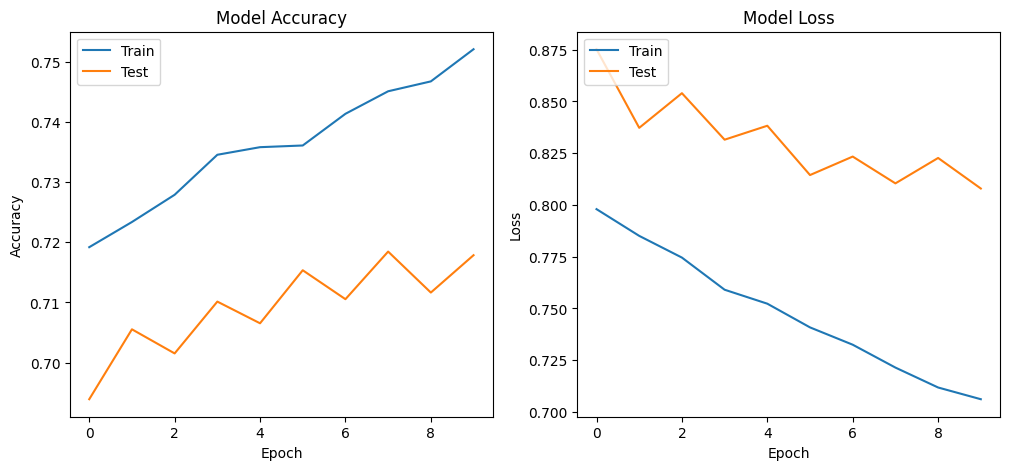

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()